In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('wine_dataset.csv')
data.head()

X = data[['chlorides','total_sulfur_dioxide']]
y = data['style']

In [42]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler(feature_range=(-1,1)).fit(X).transform(X)

# Question 1

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Question 2

In [44]:
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV(Cs=np.logspace(-6,6,20),cv=5)
print('Score: ',logreg.fit(X_train,y_train).score(X_test,y_test))

0.9513846153846154

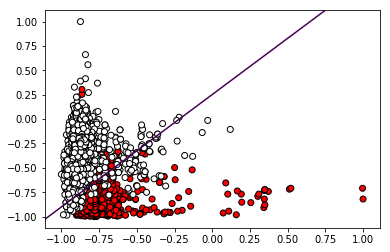

In [45]:
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k')
figure = plt.gca()
xlim = figure.get_xlim()
ylim = figure.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
P = logreg.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, P, levels=[0], alpha=1)
plt.show()

# Question 3

In [46]:
def plot_decision_boundary(predictor):
    plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k')
    figure = plt.gca()
    xlim = figure.get_xlim()
    ylim = figure.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    P = predictor.decision_function(xy).reshape(XX.shape)
    plt.contour(XX, YY, P, levels=[0], alpha=1)
    plt.show()

# Question 4

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid = {'C':np.logspace(-6,6,20)}
svc = GridSearchCV(LinearSVC(),cv=5,param_grid=grid,verbose=3)
svc.fit(X_train,y_train)

Score : 0.9532307692307692


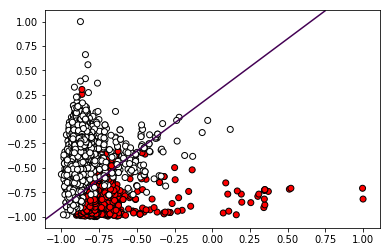

In [48]:
print('Score :',svc.score(X_test,y_test))
plot_decision_boundary(svc)

In [49]:
print(svc.best_params_)

{'C': 0.4832930238571752}


In [50]:
from sklearn.svm import SVC
svcpoly = SVC(kernel='poly',C=1,coef0=1,degree=2,gamma='auto')

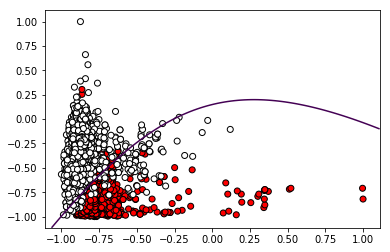

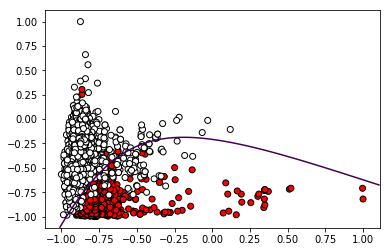

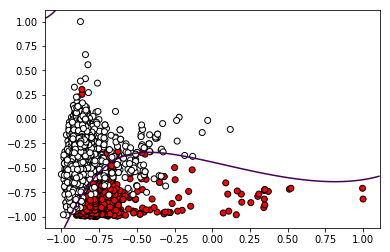

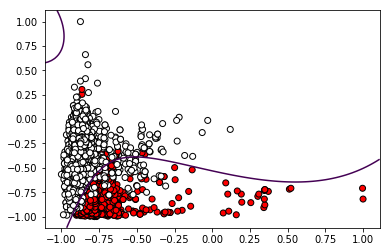

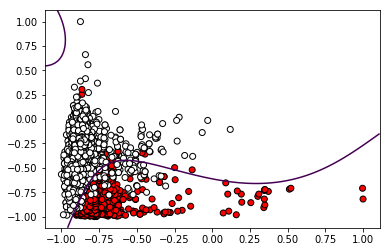

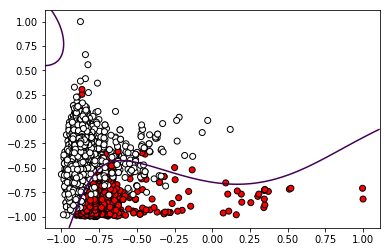

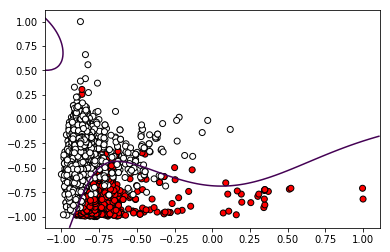

In [51]:
for degree in range(2,9):
    svcpoly = SVC(kernel='poly',C=1,coef0=1,degree=degree,gamma='auto')   
    svcpoly.fit(X_train,y_train)
    plot_decision_boundary(svcpoly)

# Question 5

In [52]:
grid={"degree": [2,3,4,5,6,7,8]}
svmpoly = GridSearchCV(SVC(kernel='poly',gamma='auto',coef0=1),param_grid=grid,cv=5,verbose=3)
svmpoly.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] degree=2 ........................................................
[CV] ............... degree=2, score=0.9467213114754098, total=   0.0s
[CV] degree=2 ........................................................
[CV] ............... degree=2, score=0.9558521560574949, total=   0.0s
[CV] degree=2 ........................................................
[CV] ............... degree=2, score=0.9486652977412731, total=   0.0s
[CV] degree=2 ........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ............... degree=2, score=0.9568788501026694, total=   0.0s
[CV] degree=2 ........................................................
[CV] ............... degree=2, score=0.9620123203285421, total=   0.0s
[CV] degree=3 ........................................................
[CV] ............... degree=3, score=0.9549180327868853, total=   0.0s
[CV] degree=3 ........................................................
[CV] ............... degree=3, score=0.9568788501026694, total=   0.0s
[CV] degree=3 ........................................................


[CV] ............... degree=3, score=0.9579055441478439, total=   0.0s
[CV] degree=3 ........................................................
[CV] ............... degree=3, score=0.9589322381930184, total=   0.0s
[CV] degree=3 ........................................................
[CV] ............... degree=3, score=0.9640657084188912, total=   0.0s
[CV] degree=4 ........................................................
[CV] ............... degree=4, score=0.9579918032786885, total=   0.0s
[CV] degree=4 ........................................................
[CV] ............... degree=4, score=0.9620123203285421, total=   0.0s
[CV] degree=4 ........................................................


[CV] ............... degree=4, score=0.9589322381930184, total=   0.0s
[CV] degree=4 ........................................................
[CV] ............... degree=4, score=0.9630390143737166, total=   0.0s
[CV] degree=4 ........................................................
[CV] ............... degree=4, score=0.9661190965092402, total=   0.0s
[CV] degree=5 ........................................................
[CV] ............... degree=5, score=0.9600409836065574, total=   0.0s
[CV] degree=5 ........................................................
[CV] ............... degree=5, score=0.9640657084188912, total=   0.0s
[CV] degree=5 ........................................................


[CV] ............... degree=5, score=0.9630390143737166, total=   0.0s
[CV] degree=5 ........................................................
[CV] ............... degree=5, score=0.9661190965092402, total=   0.0s
[CV] degree=5 ........................................................
[CV] ............... degree=5, score=0.9681724845995893, total=   0.0s
[CV] degree=6 ........................................................
[CV] ............... degree=6, score=0.9641393442622951, total=   0.0s
[CV] degree=6 ........................................................
[CV] ............... degree=6, score=0.9640657084188912, total=   0.0s
[CV] degree=6 ........................................................


[CV] ............... degree=6, score=0.9640657084188912, total=   0.0s
[CV] degree=6 ........................................................
[CV] ............... degree=6, score=0.9661190965092402, total=   0.0s
[CV] degree=6 ........................................................
[CV] ............... degree=6, score=0.9671457905544147, total=   0.0s
[CV] degree=7 ........................................................
[CV] ............... degree=7, score=0.9661885245901639, total=   0.0s
[CV] degree=7 ........................................................
[CV] ............... degree=7, score=0.9661190965092402, total=   0.0s
[CV] degree=7 ........................................................


[CV] ............... degree=7, score=0.9650924024640657, total=   0.0s
[CV] degree=7 ........................................................
[CV] ............... degree=7, score=0.9661190965092402, total=   0.0s
[CV] degree=7 ........................................................
[CV] ............... degree=7, score=0.9691991786447639, total=   0.0s
[CV] degree=8 ........................................................
[CV] ............... degree=8, score=0.9661885245901639, total=   0.0s
[CV] degree=8 ........................................................
[CV] ............... degree=8, score=0.9671457905544147, total=   0.0s
[CV] degree=8 ........................................................


[CV] ............... degree=8, score=0.9640657084188912, total=   0.0s
[CV] degree=8 ........................................................
[CV] ............... degree=8, score=0.9661190965092402, total=   0.0s
[CV] degree=8 ........................................................
[CV] ............... degree=8, score=0.9702258726899384, total=   0.0s


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'degree': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [53]:
print('Degré sélectionné: ',svmpoly.best_params_)
print('Score: ',svmpoly.score(X_test,y_test))

Degré sélectionné:  {'degree': 8}
Score:  0.976
